# 清洗数据
### 1.记录去重  PPT 15-17

记录重复，即一个或多个特征的某几条记录的值完全相同。   
方法一：利用列表（list）去重，自定义去重函数。   
方法二：利用集合（set）元素唯一的特性去重。   
比较上述两种方法可以发现，方法一代码冗长。方法二看似代码简洁了许多，但是会导致数据的排列发生改变。  


pandas提供了一个名为drop_duplicates的去重方法，使用该方法进行去重不会改变数据原始排列，并且兼具代码简洁和运行稳定的特点。
不仅支持单一特征的数据去重，还能够依据DataFrame的其中一个或多个特征进行去重操作。drop_duplicates()方法的基本使用格式如下。


方法一：按照是否愿意下载这个字段进行去重

In [2]:
# 代码 4-7
import pandas as pd
download = pd.read_csv('./data/user_download.csv', 
                       index_col=0, encoding='utf-8')
# 方法一
# 定义去重函数
def del_rep(list1):
    list2 = []
    for i in list1:
        if i not in list2:
            list2.append(i)
    return list2 
# 去重
# 将下载意愿从数据框中提取出来
download = list(download['是否愿意下载'])  
print('去重前下载意愿选项总数为：', len(download)) 
download_rep = del_rep(download)  # 使用自定义的去重函数去重
print('方法一去重后下载意愿选项总数为：', len(download_rep))
print('用户选项为：', download_rep)

去重前下载意愿选项总数为： 2175
方法一去重后下载意愿选项总数为： 3
用户选项为： ['Yes', 'No', nan]


In [3]:
# 代码 4-8
# 方法二
print('去重前下载意愿选项总数为：', len(download)) 
download_set = set(download)  # 利用set的特性去重
print('方法二去重后下载意愿选项总数为：', len(download_set))
print('用户选项为：', download_set)

去重前下载意愿选项总数为： 2175
方法二去重后下载意愿选项总数为： 3
用户选项为： {'Yes', 'No', nan}


In [4]:
# 对下载意愿去重
download = pd.read_csv('./data/user_download.csv', 
                       encoding='utf-8')
download_select = download['是否愿意下载'].drop_duplicates() 
print('drop_duplicates方法去重之后下载意愿选项总数为：', 
      len(download_select))

drop_duplicates方法去重之后下载意愿选项总数为： 3


 依照用户编号，编号去重之后用户总信息表

In [6]:
# 代码 4-10
all_info = pd.read_csv('./data/user_all_info.csv')
print('去重之前用户的形状为：', all_info.shape)
shape_det = all_info.drop_duplicates(subset = ['用户编号', 
                                               '编号']).shape
print('依照用户编号，编号去重之后用户总信息表大小为:', shape_det)

去重之前用户的形状为： (2235, 7)
依照用户编号，编号去重之后用户总信息表大小为: (2172, 7)


***
### 2. 特征重复


结合相关的数学和统计学知识，要去除连续的特征重复，可以利用特征间的相似度将两个相似度为1的特征去除其中一个。    
在pandas中，相似度的计算方法为corr()。使用该方法计算相似度时，默认为pearson法，可以通过method参数进行调节，目前还支持spearman法和kendall法。   
通过相似度矩阵去重存在一个弊端是只能对数值型重复特征去重，类别型特征之间无法通过计算相似系数来衡量相似度，因此无法根据相似度矩阵对其进行去重处理。   
除了使用相似度矩阵进行特征去重之外，还可以通过equals()方法进行特征去重。   


In [10]:
#%conda install scipy

In [9]:
# 代码 4-11
# 求取年龄和每月支出的相似度
corr_det = all_info[['年龄', '每月支出']].corr(method='kendall')
print('年龄和每月支出的相似度矩阵为：\n', corr_det)


年龄和每月支出的相似度矩阵为：
             年龄      每月支出
年龄    1.000000  0.011119
每月支出  0.011119  1.000000


In [27]:
all_info = pd.read_csv('./data/user_all_info.csv')
#请务必保证用于计算相似度的字段都是数值型

#假如 年龄包含一个非数值的记录，如何删除
all_info = all_info[pd.to_numeric(all_info['年龄'], errors='coerce').notnull()]


# 代码 4-12
corr_det1 = all_info[[ '年龄', '每月支出'
                      ]].corr(method='pearson')
print('居住类型、年龄和每月支出的pearson法相似度矩阵为：\n', corr_det1)

居住类型、年龄和每月支出的pearson法相似度矩阵为：
             年龄      每月支出
年龄    1.000000  0.014168
每月支出  0.014168  1.000000


***
### 3检测与处理缺失值

在数据中的某个或某些特征的值是不完整的，这些值称为缺失值。   
pandas提供了识别缺失值的isnull()方法以及识别非缺失值的notnull()方法，这两种方法在使用时返回的都是布尔值，即True和False。   
结合sum函数、isnull()方法和notnull()方法，可以检测数据中缺失值的分布以及数据中一共含有多少缺失值。   
isnull()方法和notnull()方法的结果正好相反，因此使用其中任意一个都可以识别出数据是否存在缺失值。  


In [28]:
# 代码 4-15
print('all_info每个特征缺失的数目为：\n', all_info.isnull().sum())
print('all_info每个特征非缺失的数目为：\n', all_info.notnull().sum())


all_info每个特征缺失的数目为：
 用户编号       0
年龄         0
性别         0
居住类型      22
编号         0
每月支出      20
是否愿意下载    20
dtype: int64
all_info每个特征非缺失的数目为：
 用户编号      2229
年龄        2229
性别        2229
居住类型      2207
编号        2229
每月支出      2209
是否愿意下载    2209
dtype: int64


***
删除方法 dropna  

pandas.DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

![本地路径](.\\pics\\3.png "相对路径演示,下一级目录")

In [30]:
# 代码 4-16
print('去除缺失的行前all_info的形状为：', all_info.shape)
all_info1 = all_info.dropna(axis=0, how='any')
print('去除缺失的行后all_info的形状为：', all_info1.shape)
all_info1.to_csv('./tmp/all_info_notnull.csv', index=False)

去除缺失的行前all_info的形状为： (2229, 7)
去除缺失的行后all_info的形状为： (2169, 7)


***
缺失值替换
替换法是指用一个特定的值替换缺失值。   
特征可分为数值型和类别型，两者出现缺失值时的处理方法也是不同的。   
当缺失值所在特征为数值型时，通常利用其均值、中位数或众数等描述其集中趋势的统计量来代替缺失值。  
当缺失值所在特征为类别型时，则选择使用众数来替换缺失值。  




![本地路径](.\\pics\\4.png "相对路径演示,下一级目录")
![本地路径](.\\pics\\5.png "相对路径演示,下一级目录")

In [33]:
# 代码 4-17
# 求每月支出平均值
mean_num = all_info['每月支出'].mean()
# 缺失值替换为均值
all_info['每月支出'] = all_info['每月支出'].fillna(mean_num)
print('每月支出特征缺失的数目为：\n', 
      all_info['每月支出'].isnull().sum())

每月支出特征缺失的数目为：
 0


***
### 3. 插值法  见PPT 26到28


In [34]:
import numpy as np
from scipy.interpolate import interp1d
# 创建自变量x
x = np.array([1, 2, 3, 4, 5, 8, 9, 10])  
# 创建因变量y1
y1 = np.array([2, 8, 18, 32, 50, 128, 162, 200])  
# 创建因变量y2
y2 = np.array([3, 5, 7, 9, 11, 17, 19, 21])  
# 线性插值拟合x、y1
linear_ins_value1 = interp1d(x, y1, kind='linear')  
# 线性插值拟合x、y2
linear_ins_value2 = interp1d(x, y2, kind='linear')  
print('当x为6、7时，使用线性插值y1为：', linear_ins_value1([6, 7]))
print('当x为6、7时，使用线性插值y2为：', linear_ins_value2([6, 7]))

# 拉格朗日插值
from scipy.interpolate import lagrange
large_ins_value1 = lagrange(x, y1)  # 拉格朗日插值拟合x、y1
large_ins_value2 = lagrange(x, y2)  # 拉格朗日插值拟合x、y2
print('当x为6,7时，使用拉格朗日插值y1为：', large_ins_value1([6, 7]))
print('当x为6,7时，使用拉格朗日插值y2为：', large_ins_value2([6, 7]))

# 样条插值
# 样条插值拟合x、y1
y1_new = np.linspace(x.min(), x.max(), 10)
f = interp1d(x, y1, kind='cubic')  # 编辑插值函数格式
spline_ins_value1 = f(y1_new) # 通过相应的插值函数求得新的函数点
# 样条插值拟合x、y2
y2_new = np.linspace(x.min(), x.max(), 10)
f = interp1d(x, y2, kind='cubic')  # 编辑插值函数格式
spline_ins_value2 = f(y2_new) # 通过相应的插值函数求得新的函数点
print('使用样条插值y1为：', spline_ins_value1)
print('使用样条插值y2为：', spline_ins_value2)


当x为6、7时，使用线性插值y1为： [ 76. 102.]
当x为6、7时，使用线性插值y2为： [13. 15.]
当x为6,7时，使用拉格朗日插值y1为： [72. 98.]
当x为6,7时，使用拉格朗日插值y2为： [13. 15.]
使用样条插值y1为： [  2.   8.  18.  32.  50.  72.  98. 128. 162. 200.]
使用样条插值y2为： [ 3.  5.  7.  9. 11. 13. 15. 17. 19. 21.]


### 4检测与处理异常值  见PPT

In [36]:
all_info = pd.read_csv('./tmp/all_info_notnull.csv')
# 定义3σ原则来识别异常值函数
def out_range(ser1):
    bool_ind = (ser1.mean() - 3 * ser1.std() > ser1) | \
    (ser1.mean() + 3 * ser1.var() < ser1)
    index = np.arange(ser1.shape[0])[bool_ind]
    outrange = ser1.iloc[index]
    return outrange
outlier = out_range(all_info['年龄'])
print('使用3σ原则判定异常值个数为:', outlier.shape[0])
print('异常值的最大值为：', outlier.max())
print('异常值的最小值为：', outlier.min())

使用3σ原则判定异常值个数为: 7
异常值的最大值为： -1.0
异常值的最小值为： -5.0


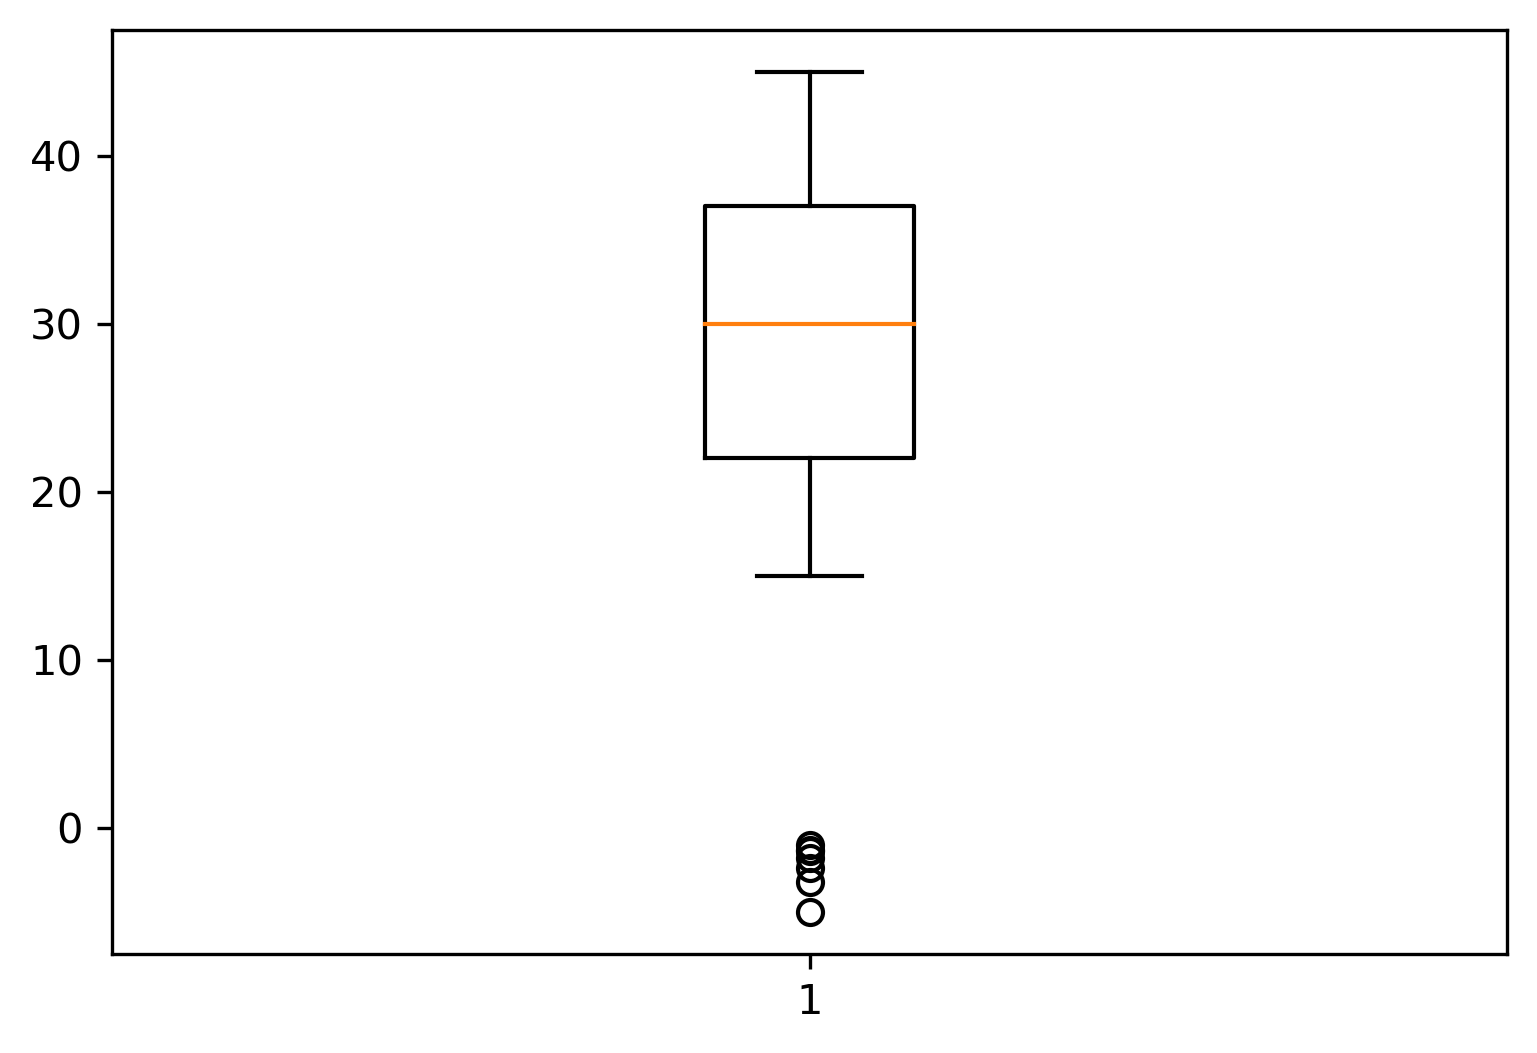

年龄数据异常值个数为： 7
年龄数据异常值的最大值为： -1.0
年龄数据异常值的最小值为： -5.0


In [39]:
# 代码 4-20
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=300)
p = plt.boxplot(list(all_info['年龄'].values))  # 画出箱线图
outlier1 = p['fliers'][0].get_ydata()  # fliers为异常值的标签
plt.savefig('./tmp/用户年龄异常数据识别.jpg')
plt.show()
print('年龄数据异常值个数为：', len(outlier1))
print('年龄数据异常值的最大值为：', max(outlier1))
print('年龄数据异常值的最小值为：', min(outlier1))